# KNN classifier

This exploration was produced using a combination of the Introduction to Statistical Learning (ISLR) book and scikit-learn documentation.

The K Nearest Neighbors algorithm is a simple classifier algorithm that predicts the label of a new data point based on the the number of training samples closest to it.  

The 3 main steps to this algorithm are as follows:
* Calculate the distance from the new point to all the training samples
* Sort the samples by distance from the new point
* Predict the new point label based on the closest training samples
    * The closest samples are based on a user defined parameter ***K***, wich is the number of points used to determine the new point's label
    
The prediction is made as follows: <sub>(from ISLR: equation 2.12, pg. 39)</sub>
$$Pr(Y = j\mid X = x_o) = \frac{1}{K}\sum_{i\ \in N_o}I(y_i = j)$$ 

where: $I$ is the indicator variable, $x_o$ is the new data point, $N_o$ is the set of points closest to the new data point

The parameter ***K*** has a dramatic affect on the predicted value.
<img src="knn_pic.JPG" alt="mouse drawing skills" title="KNN K value example" />

From my graph showing a data set with a new data point inserted in, the difference between selecting a K value of 3 vs. a K value of 6 is shown.  If we were to choose K to equal 3, then the algorithm would choose the new data point to be in the blue class. If we set K equal to 6, then the new point belongs to the green class.

Choosing a good K value is of high importance to acheiving a good performing model. Low values of K can be too flexible and create an *overfitted* model. A K that is too high will have a high rate of misclassification. 

To check for overfitting, the model can be tested against a test set of data, while iteratively changing K


## MNIST dataset   
Since the matlab book uses this dataset with a KNN classifier, I will explore a KNN classifier application here in python. 

[MNIST dataset website](http://yann.lecun.com/exdb/mnist/)

The MNIST dataset is a collection of handwritten numbers.  It has 60 thousand training samples and 10 thousand test examples. The samples are 28x28 px black and white images of numbers.

The scikit-learn library has the MNIST dataset built in and provides a way to automatically download it.


In [102]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [6]:
mnist_data = datasets.fetch_mldata('MNIST Original')   # pulls data from http://mldata.org/ instead of MNIST website

In [18]:
print('data shape',mnist_data.data.shape)
print('target shape',mnist_data.target.shape)

data shape (70000, 784)
target shape (70000,)


This dataset is made up of 70,000 samples of images. The images are in the form of a 1-D array of 774 greyscale values from 0 to 255. It is the result of a flattened 28 x 28 pixel image.

I think we can check an image out by reshaping a sample and plotting it.

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

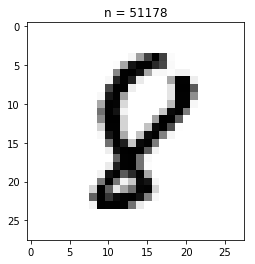

In [46]:
n = np.random.randint(0,70000)                       # selecting a random int between 0 and 70k (just for fun)
sample_image = mnist_data.data[n].reshape(28,28)     # reshape the first entry as a 28 x 28 matrix
plt.imshow(sample_image,cmap='Greys')                # after much trial and tribulation...
plt.title('n = ' + str(n))

## Building a model
I will first try and "homebrew" an algorithm to see if I can get any sort of performance from it. My plan is to use the 3 main steps mentioned above, but first I need to split up the data into a test set and a training set.

### algorithms within algorithms
After reading some the sklearn documentation about KNN, it turns out there are a few different algorithms for determining the distance between observations.  The first and most strait forward is the brute-force method, which literally just takes the difference between each point. This is what I was planning on doing for the homebrew algorithm.  However, the documentation also says that this is only effective for samples of 30 or less.  I have 60,000.

I will try to take a set of 30 random samples and implement the homebrew method. 

In [109]:
toy_X = np.zeros((30,784))
toy_y = np.zeros(30)
for rows in range(30):
    i = np.random.randint(0,60000)
    toy_X[rows] = mnist_data.data[i]
    toy_y[rows] = mnist_data.target[i]
print(toy_X)
print(toy_y)


[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[ 4.  6.  7.  9.  6.  2.  3.  6.  2.  3.  2.  5.  8.  2.  8.  8.  6.  5.
  7.  7.  7.  0.  9.  0.  4.  9.  5.  8.  2.  1.]



from the MNIST website, it says the data consists of 60,000 training samples and 10,0000 test samples, so I will stick with that.  sk-learn has a little function that performs a split of the data in a random manner and is standard practice for building ML models in python.

In [47]:
from sklearn.model_selection import train_test_split

In [49]:
# splitting data up into sets
testSize = 10000
X_train, X_test, y_train, y_test = train_test_split(mnist_data.data, mnist_data.target, test_size=testSize)

In [107]:
toy_X.shape

(20, 784)

In [83]:
mnist_data.data[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64,
       253, 255,  63,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        96, 205, 251, 253, 205, 111,   4,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   